This note checks the correlation between the optical-to-radio offsets and the closure amplitude rms (CARMS) from Xu et al. (2019).

The correlation tests suggest a lack of connection between the optical-to-radio offset and the CARMS.

In [1]:
from astropy.table import Table, join
from astropy import units as u
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

# My progs
from CorrTest import NWSmooth, new_corr_test

In [2]:
carms = Table.read("../data/Xu2019-table2.fits")

carms.rename_column("IERS", "iers_name")

In [3]:
# Radio-to-optical offset
r2o = Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

# Cross-match
r2o_cd = join(r2o, carms, keys="iers_name")

print("Find Closure amplitude rms for {:d} sources.".format(len(r2o_cd)))

Find Closure amplitude rms for 472 sources.


# 1. Global distribution

Closure Amplitude RMS (different weighting schemes)
Weighting      Significant     Very Extended
                   > 0.3           > 0.4
Natural             1031             617  
Basic-noise         1290             851  
Uniform             1390             928  


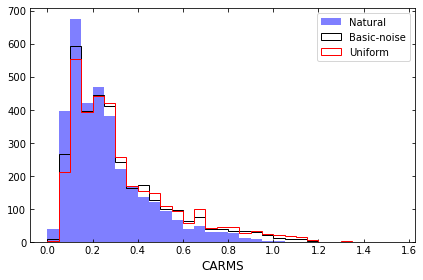

In [4]:
fig, ax = plt.subplots()

bins = np.arange(0, 1.6, 0.05)

ax.hist(carms["CARMS-N"], bins=bins, histtype="stepfilled",
        color="b", alpha=0.5, label="Natural")
ax.hist(carms["CARMS-B"], bins=bins, histtype="step", 
         color="k", label="Basic-noise")
ax.hist(carms["CARMS-U"], bins=bins, histtype="step", 
         color="r", label="Uniform")
ax.set_xlabel("CARMS", fontsize=12)

ax.legend()

plt.tight_layout()

print("Closure Amplitude RMS (different weighting schemes)")

# CARMS 
print("Weighting      Significant     Very Extended")
print("                   > 0.3           > 0.4")

# Natural
mask1 = (carms["CARMS-N"] > 0.3)
mask2 = (carms["CARMS-N"] > 0.4)
num1 = len(carms[mask1])
num2 = len(carms[mask2])
print("Natural            {:5d}           {:5d}  ".format(num1, num2))

# Basic
mask1 = (carms["CARMS-B"] > 0.3)
mask2 = (carms["CARMS-B"] > 0.4)
num1 = len(carms[mask1])
num2 = len(carms[mask2])
print("Basic-noise        {:5d}           {:5d}  ".format(num1, num2))

# Uniform
mask1 = (carms["CARMS-U"] > 0.3)
mask2 = (carms["CARMS-U"] > 0.4)
num1 = len(carms[mask1])
num2 = len(carms[mask2])
print("Uniform            {:5d}           {:5d}  ".format(num1, num2))

# 2 $\rho$ vs. CARMS

## 2.1 Natural weighting scheme

In [5]:
# Bin the data for plot
keys = "CARMS-N"
r2o_cd.sort(keys)

x = np.array(r2o_cd[keys])
y_sx = np.array(r2o_cd["ang_sep_sx_cor"])
y_k = np.array(r2o_cd["ang_sep_k_cor"])
y_xka = np.array(r2o_cd["ang_sep_ka_cor"])

nw_mean_sx = NWSmooth(x, y_sx)
nw_mean_k = NWSmooth(x, y_k)
nw_mean_xka = NWSmooth(x, y_xka)

Angular separation vs. CARMS (Natural weighting)


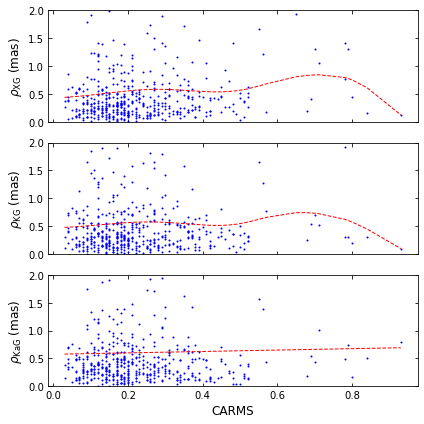

In [6]:
print("Angular separation vs. CARMS (Natural weighting)")

# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 6),
                                    nrows=3,
                                    sharex=True, sharey=True)

ax0.plot(r2o_cd["CARMS-N"], r2o_cd["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_cd["CARMS-N"], r2o_cd["ang_sep_k_cor"], "b.", ms=2)
ax2.plot(r2o_cd["CARMS-N"], r2o_cd["ang_sep_ka_cor"], "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax1.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax2.set_xlabel("CARMS", fontsize=12)

ax0.set_ylim([0, 2])

plt.subplots_adjust()
plt.tight_layout()

Angular separation vs. CARMS (Natural weighting)


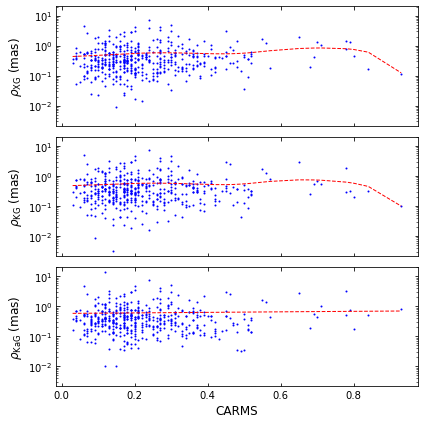

In [7]:
print("Angular separation vs. CARMS (Natural weighting)")

# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 6),
                                    nrows=3,
                                    sharex=True, sharey=True)

ax0.plot(r2o_cd["CARMS-N"], r2o_cd["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_cd["CARMS-N"], r2o_cd["ang_sep_k_cor"], "b.", ms=2)
ax2.plot(r2o_cd["CARMS-N"], r2o_cd["ang_sep_ka_cor"], "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax1.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax2.set_xlabel("CARMS", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

In [8]:
new_corr_test(x, [y_sx, y_k, y_xka], [nw_mean_sx, nw_mean_k, nw_mean_xka],
              obj_name="Rho vs. CARMS (Natural)",
              ylabel=["SX", "K", "XKa"])

Rho vs. CARMS (Natural)
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +6.0e-02   1.9e-01  +9.3e-02   4.3e-02  +6.3e-02   4.4e-02
K           +2.4e-02   6.1e-01  +2.9e-02   5.3e-01  +1.8e-02   5.6e-01
XKa         +1.8e-02   6.9e-01  -5.1e-04   9.9e-01  -5.8e-04   9.9e-01
-----------------------------------------------------------------
Smoothed
SX          +6.8e-01   9.8e-65  +8.5e-01  1.6e-133  +7.5e-01  6.9e-124
K           +3.4e-01   6.1e-14  +6.0e-01   2.8e-47  +5.4e-01   8.4e-65
XKa         +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  6.2e-220
-----------------------------------------------------------------


## 2.2 Basic-noise weighting scheme

In [9]:
# Bin the data for plot
keys = "CARMS-B"
r2o_cd.sort(keys)

x = np.array(r2o_cd[keys])
y_sx = np.array(r2o_cd["ang_sep_sx_cor"])
y_k = np.array(r2o_cd["ang_sep_k_cor"])
y_xka = np.array(r2o_cd["ang_sep_ka_cor"])

nw_mean_sx = NWSmooth(x, y_sx)
nw_mean_k = NWSmooth(x, y_k)
nw_mean_xka = NWSmooth(x, y_xka)

Angular separation vs. CARMS (Basic-noise weighting)


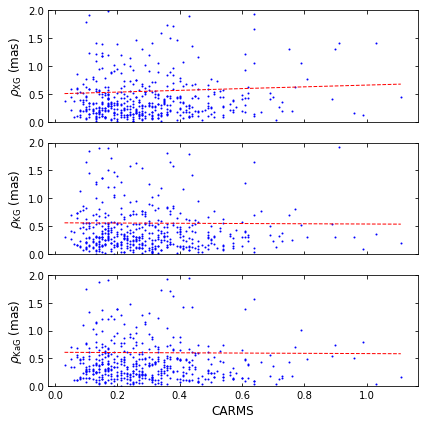

In [10]:
print("Angular separation vs. CARMS (Basic-noise weighting)")

# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 6),
                                    nrows=3, 
                                    sharex=True, sharey=True)

ax0.plot(r2o_cd["CARMS-B"], r2o_cd["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_cd["CARMS-B"], r2o_cd["ang_sep_k_cor"], "b.", ms=2)
ax2.plot(r2o_cd["CARMS-B"], r2o_cd["ang_sep_ka_cor"], "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax1.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax2.set_xlabel("CARMS", fontsize=12)

ax0.set_ylim([0, 2])

plt.subplots_adjust()
plt.tight_layout()

Angular separation vs. CARMS (Basic-noise weighting)


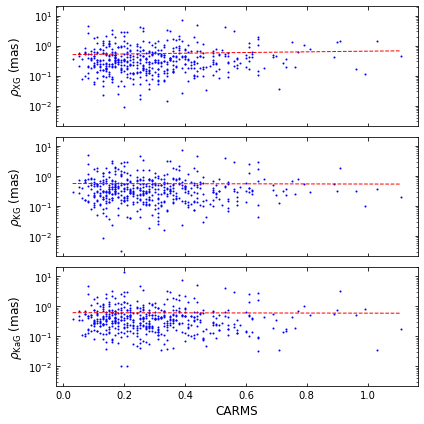

In [11]:
print("Angular separation vs. CARMS (Basic-noise weighting)")

# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 6),
                                    nrows=3, 
                                    sharex=True, sharey=True)

ax0.plot(r2o_cd["CARMS-B"], r2o_cd["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_cd["CARMS-B"], r2o_cd["ang_sep_k_cor"], "b.", ms=2)
ax2.plot(r2o_cd["CARMS-B"], r2o_cd["ang_sep_ka_cor"], "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax1.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax2.set_xlabel("CARMS", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

In [12]:
new_corr_test(x, [y_sx, y_k, y_xka], [nw_mean_sx, nw_mean_k, nw_mean_xka],
              obj_name="Rho vs. CARMS (basical)",
              ylabel=["SX", "K", "XKa"])

Rho vs. CARMS (basical)
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +3.8e-02   4.1e-01  +4.2e-02   3.7e-01  +2.8e-02   3.7e-01
K           -5.3e-03   9.1e-01  -4.0e-02   3.8e-01  -2.7e-02   3.8e-01
XKa         -4.3e-03   9.2e-01  -6.0e-02   1.9e-01  -4.0e-02   1.9e-01
-----------------------------------------------------------------
Smoothed
SX          +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  4.3e-223
K           -1.0e+00   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00  4.3e-223
XKa         -1.0e+00   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00  4.3e-223
-----------------------------------------------------------------


## 2.3 Uniform weighting scheme

In [13]:
# Bin the data for plot
keys = "CARMS-U"
r2o_cd.sort(keys)

x = np.array(r2o_cd[keys])
y_sx = np.array(r2o_cd["ang_sep_sx_cor"])
y_k = np.array(r2o_cd["ang_sep_k_cor"])
y_xka = np.array(r2o_cd["ang_sep_ka_cor"])

nw_mean_sx = NWSmooth(x, y_sx)
nw_mean_k = NWSmooth(x, y_k)
nw_mean_xka = NWSmooth(x, y_xka)

Angular separation vs. CARMS (Uniform weighting)


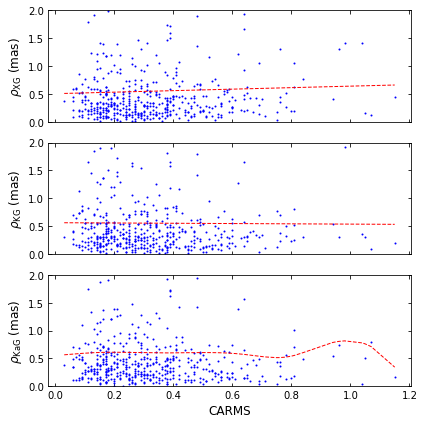

In [14]:
print("Angular separation vs. CARMS (Uniform weighting)")

# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 6),
                                    nrows=3, 
                                    sharex=True, sharey=True)

ax0.plot(r2o_cd["CARMS-U"], r2o_cd["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_cd["CARMS-U"], r2o_cd["ang_sep_k_cor"], "b.", ms=2)
ax2.plot(r2o_cd["CARMS-U"], r2o_cd["ang_sep_ka_cor"], "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax1.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax2.set_xlabel("CARMS", fontsize=12)

ax0.set_ylim([0, 2])

plt.subplots_adjust()
plt.tight_layout()

Angular separation vs. CARMS (Uniform weighting)


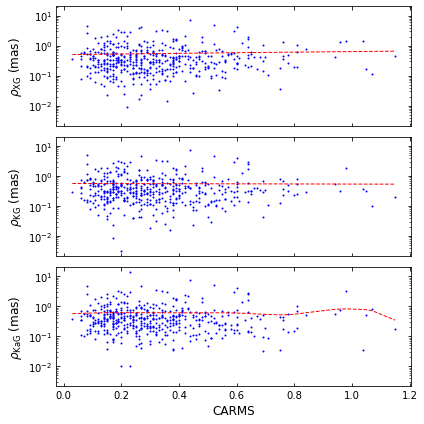

In [15]:
print("Angular separation vs. CARMS (Uniform weighting)")

# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 6),
                                    nrows=3, 
                                    sharex=True, sharey=True)

ax0.plot(r2o_cd["CARMS-U"], r2o_cd["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_cd["CARMS-U"], r2o_cd["ang_sep_k_cor"], "b.", ms=2)
ax2.plot(r2o_cd["CARMS-U"], r2o_cd["ang_sep_ka_cor"], "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax1.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax2.set_xlabel("CARMS", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

In [16]:
new_corr_test(x, [y_sx, y_k, y_xka], [nw_mean_sx, nw_mean_k, nw_mean_xka],
              obj_name="Rho vs. CARMS (Uniform)",
              ylabel=["SX", "K", "XKa"])

Rho vs. CARMS (Uniform)
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +3.5e-02   4.5e-01  +3.3e-02   4.7e-01  +2.3e-02   4.7e-01
K           -6.6e-03   8.9e-01  -5.0e-02   2.8e-01  -3.3e-02   2.9e-01
XKa         -1.3e-03   9.8e-01  -6.5e-02   1.6e-01  -4.3e-02   1.7e-01
-----------------------------------------------------------------
Smoothed
SX          +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.8e-223
K           -1.0e+00   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00  1.8e-223
XKa         -7.8e-02   9.2e-02  -3.5e-01   2.6e-15  -2.8e-01   6.5e-19
-----------------------------------------------------------------
